# 서울시 CCTV 현황 분석 및 인구 현황 분석

### CCTV 설치현황

In [5]:
import pandas as pd

In [6]:
CCTV_seoul = pd.read_excel("../Data/CCTV_in_Seoul_2018.xlsx")
CCTV_seoul.head()

,기관명,소계,2011년 이전,2012년,2013년,2014년,2015년,2016년,2017년,2018년
0,강남구,5221,1944.0,195.0,316.0,430,546,765,577,448
1,강동구,1879,303.0,387.0,134.0,59,144,194,273,385
2,강북구,1265,243.0,88.0,141.0,74,145,254,1,319
3,강서구,1617,219.0,155.0,118.0,230,187,190,264,254
4,관악구,3985,430.0,56.0,419.0,487,609,619,694,671


In [7]:
# 컬럼 확인 
CCTV_seoul.columns

Index(['기관명', '소계', '2011년 이전', '2012년', '2013년', '2014년', '2015년', '2016년',
       '2017년', '2018년'],
      dtype='object')

In [8]:
CCTV_seoul.columns[0]

'기관명'

In [9]:
# 기관명 -> 구별로 변경 
CCTV_seoul.rename(columns={"기관명":"구별"},inplace=True)

In [10]:
CCTV_seoul.head()

,구별,소계,2011년 이전,2012년,2013년,2014년,2015년,2016년,2017년,2018년
0,강남구,5221,1944.0,195.0,316.0,430,546,765,577,448
1,강동구,1879,303.0,387.0,134.0,59,144,194,273,385
2,강북구,1265,243.0,88.0,141.0,74,145,254,1,319
3,강서구,1617,219.0,155.0,118.0,230,187,190,264,254
4,관악구,3985,430.0,56.0,419.0,487,609,619,694,671


In [11]:
# NaN을 확인하고 NaN을 0으로 대체 
CCTV_seoul.isnull().sum()

구별          0
소계          0
2011년 이전    2
2012년       2
2013년       2
2014년       0
2015년       0
2016년       0
2017년       0
2018년       0
dtype: int64

In [12]:
CCTV_seoul=CCTV_seoul.fillna(0)

In [13]:
CCTV_seoul.isnull().sum()

구별          0
소계          0
2011년 이전    0
2012년       0
2013년       0
2014년       0
2015년       0
2016년       0
2017년       0
2018년       0
dtype: int64

---
### 서울 인구 데이터프레임

In [14]:
seoul_pop = pd.read_excel("../Data/population_in_Seoul_2020.xlsx")
seoul_pop.head()
# 1,3,6,9,13

,report,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13
0,기간,자치구,세대,인구,인구,인구,인구,인구,인구,인구,인구,인구,세대당인구,65세이상고령자
1,기간,자치구,세대,합계,합계,합계,한국인,한국인,한국인,등록외국인,등록외국인,등록외국인,세대당인구,65세이상고령자
2,기간,자치구,세대,계,남자,여자,계,남자,여자,계,남자,여자,세대당인구,65세이상고령자
3,2020.1/4,합계,4354006,10013781,4874995,5138786,9733655,4742217,4991438,280126,132778,147348,2.24,1518239
4,2020.1/4,종로구,74151,161984,78271,83713,151217,73704,77513,10767,4567,6200,2.04,28073


In [15]:
seoul_pop2 =seoul_pop.iloc[:,[1,3,6,9,13]]
seoul_pop2.head()

,Unnamed: 1,Unnamed: 3,Unnamed: 6,Unnamed: 9,Unnamed: 13
0,자치구,인구,인구,인구,65세이상고령자
1,자치구,합계,한국인,등록외국인,65세이상고령자
2,자치구,계,계,계,65세이상고령자
3,합계,10013781,9733655,280126,1518239
4,종로구,161984,151217,10767,28073


In [16]:
seoul_pop2.columns =['자치구','계','계.1','계2','65세이상고령자']

In [17]:
seoul_pop2.head()

,자치구,계,계.1,계2,65세이상고령자
0,자치구,인구,인구,인구,65세이상고령자
1,자치구,합계,한국인,등록외국인,65세이상고령자
2,자치구,계,계,계,65세이상고령자
3,합계,10013781,9733655,280126,1518239
4,종로구,161984,151217,10767,28073


In [18]:
# 불러올 때 부분만 가져오기 
pop_seoul = pd.read_excel("../Data/population_in_Seoul_2020.xlsx",
                        header=3,      # 헤더를 쓸 행의 번호  
                        usecols="B,D,G,J,N"         # 엑셀에서만 가능함 
)
pop_seoul.head()

,자치구,계,계.1,계.2,65세이상고령자
0,합계,10013781,9733655,280126,1518239
1,종로구,161984,151217,10767,28073
2,중구,136469,126175,10294,23794
3,용산구,246165,229579,16586,39439
4,성동구,307193,299042,8151,44728


In [19]:
# 이름변경 
pop_seoul.columns =['구별','인구수','한국인','외국인','고령자']

In [20]:
pop_seoul.head()

,구별,인구수,한국인,외국인,고령자
0,합계,10013781,9733655,280126,1518239
1,종로구,161984,151217,10767,28073
2,중구,136469,126175,10294,23794
3,용산구,246165,229579,16586,39439
4,성동구,307193,299042,8151,44728


In [21]:
# 합계 행 삭제
# pop_seoul=pop_seoul.iloc[1:,:]

In [22]:
pop_seoul.head()

,구별,인구수,한국인,외국인,고령자
0,합계,10013781,9733655,280126,1518239
1,종로구,161984,151217,10767,28073
2,중구,136469,126175,10294,23794
3,용산구,246165,229579,16586,39439
4,성동구,307193,299042,8151,44728


In [23]:
#2 
#pop_seoul.drop(0,inplace=True)  # 행기준이 디폴트 값

### CCTV 현황


In [24]:
# CCTV에서 소계로 오름차순 정렬
CCTV_seoul.sort_values(by='소계', inplace= True)

In [25]:
CCTV_seoul.head()

,구별,소계,2011년 이전,2012년,2013년,2014년,2015년,2016년,2017년,2018년
9,도봉구,858,197.0,66.0,8.0,185,59,155,117,71
24,중랑구,1068,0.0,0.0,0.0,770,102,121,66,9
2,강북구,1265,243.0,88.0,141.0,74,145,254,1,319
22,종로구,1471,8.0,7.0,599.0,132,195,148,281,101
23,중구,1544,25.0,165.0,114.0,80,245,270,317,328


> CCTV 댓수가 적은 지역으로는 도봉구,중랑구,강북구,종로구, 중구 순이다

In [26]:
# CCTV에서 소계로 내림차순 정렬
CCTV_seoul.sort_values(by='소계', ascending=False).head()

,구별,소계,2011년 이전,2012년,2013년,2014년,2015년,2016년,2017년,2018년
0,강남구,5221,1944.0,195.0,316.0,430,546,765,577,448
4,관악구,3985,430.0,56.0,419.0,487,609,619,694,671
6,구로구,3227,852.0,219.0,349.0,187,268,326,540,486
16,성북구,3003,779.0,84.0,304.0,241,279,388,285,643
21,은평구,2962,1365.0,83.0,99.0,343,180,296,229,367


> CCTV 댓수가 많은 지역으로는 강남구, 관악구, 구로구, 성북구, 은평구 순이다.

In [27]:
### 최근 3년간 CCTV 증가율을 구해서 제일 많이 증가한 구를 검색 후 정렬
# 2016 ~2018 의 갯수와 나머지총합를 비교 

In [28]:
# 3년간 합 
CCTV_seoul['최근증가율'] = ((CCTV_seoul[['2016년','2017년','2018년']].sum(axis=1))/(CCTV_seoul.iloc[:,2:7].sum(axis=1))  ) *100
#election['electionSum']= election[['이재명','윤석열','심상정']].sum(axis=1)


In [29]:
CCTV_seoul.iloc[:,2:7].sum(axis=1)

9      515.0
24     872.0
2      691.0
22     941.0
23     629.0
5      746.0
17     974.0
3      909.0
7      769.0
11     993.0
1     1027.0
8     1342.0
12    1009.0
10    1437.0
20    1841.0
13    1235.0
19    1042.0
15    1251.0
18    1459.0
14    1840.0
21    2070.0
16    1687.0
6     1875.0
4     2001.0
0     3431.0
dtype: float64

In [30]:
# 정렬
CCTV_seoul.sort_values(by="최근증가율",ascending=False).head()

,구별,소계,2011년 이전,2012년,2013년,2014년,2015년,2016년,2017년,2018년,최근증가율
23,중구,1544,25.0,165.0,114.0,80,245,270,317,328,145.468998
19,영등포구,2495,132.0,121.0,206.0,217,366,289,371,793,139.443378
15,성동구,2679,665.0,109.0,118.0,101,258,201,933,294,114.148681
7,금천구,1634,27.0,17.0,242.0,101,382,136,199,530,112.483745
5,광진구,1581,470.0,42.0,83.0,87,64,21,468,346,111.930295


> 결과 : 최근 3년간 cctv가 2015년 이전에 비해 가장 많이 증가한 곳은 중구, 영등포구, 성동구, 금천구, 광진구이다

---
### 인구현황

In [31]:
# 구별 Data의 유효성 확인 
len(pop_seoul['구별'].unique())

26

In [32]:
pop_seoul.head()

,구별,인구수,한국인,외국인,고령자
0,합계,10013781,9733655,280126,1518239
1,종로구,161984,151217,10767,28073
2,중구,136469,126175,10294,23794
3,용산구,246165,229579,16586,39439
4,성동구,307193,299042,8151,44728


In [33]:
pop_seoul['외국인비율']=(pop_seoul['외국인']) / (pop_seoul['인구수']) * 100
pop_seoul['고령자비율']=(pop_seoul['고령자']) / (pop_seoul['인구수']) * 100

In [34]:
pop_seoul.head()

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
0,합계,10013781,9733655,280126,1518239,2.797405,15.161496
1,종로구,161984,151217,10767,28073,6.646953,17.330724
2,중구,136469,126175,10294,23794,7.543105,17.435462
3,용산구,246165,229579,16586,39439,6.737757,16.021368
4,성동구,307193,299042,8151,44728,2.653381,14.560228


In [35]:
# 인구수가 제일 많은 지역 TOP 5 
pop_seoul.sort_values(by="인구수",ascending=False).head()

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
0,합계,10013781,9733655,280126,1518239,2.797405,15.161496
24,송파구,680883,674095,6788,89539,0.996941,13.150424
16,강서구,595703,589302,6401,85992,1.074529,14.435381
23,강남구,549898,544804,5094,72602,0.926354,13.202812
11,노원구,535495,531037,4458,82682,0.832501,15.440294


In [36]:
# 외국인이 제일 많은 지역 TOP 5 
pop_seoul.sort_values(by="외국인",ascending=False).head()

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
0,합계,10013781,9733655,280126,1518239,2.797405,15.161496
19,영등포구,404766,371903,32863,59373,8.119012,14.668475
17,구로구,438308,405837,32471,67432,7.408261,15.384615
18,금천구,251370,232583,18787,38508,7.473843,15.319251
21,관악구,516662,499374,17288,76664,3.346095,14.838328


In [37]:
# 외국인 비율이 높은 지역 TOP 5 
pop_seoul.sort_values(by="외국인비율",ascending=False)

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
19,영등포구,404766,371903,32863,59373,8.119012,14.668475
2,중구,136469,126175,10294,23794,7.543105,17.435462
18,금천구,251370,232583,18787,38508,7.473843,15.319251
17,구로구,438308,405837,32471,67432,7.408261,15.384615
3,용산구,246165,229579,16586,39439,6.737757,16.021368
1,종로구,161984,151217,10767,28073,6.646953,17.330724
6,동대문구,362793,346156,16637,60367,4.585811,16.639516
5,광진구,365990,350417,15573,48989,4.255034,13.385338
13,서대문구,325875,312642,13233,53038,4.060759,16.275566
21,관악구,516662,499374,17288,76664,3.346095,14.838328


> 외국인이 가장 많고 비율도 높은 곳은 영등포구 

In [39]:
# 고령자 정렬 
pop_seoul.sort_values(by="고령자",ascending=False)

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
0,합계,10013781,9733655,280126,1518239,2.797405,15.161496
24,송파구,680883,674095,6788,89539,0.996941,13.150424
16,강서구,595703,589302,6401,85992,1.074529,14.435381
11,노원구,535495,531037,4458,82682,0.832501,15.440294
12,은평구,482509,478019,4490,82245,0.930553,17.045278
21,관악구,516662,499374,17288,76664,3.346095,14.838328
23,강남구,549898,544804,5094,72602,0.926354,13.202812
8,성북구,454532,442494,12038,72172,2.648438,15.878310
17,구로구,438308,405837,32471,67432,7.408261,15.384615
7,중랑구,400678,395619,5059,66764,1.262610,16.662757


In [40]:
# 고령자 비율 정렬 
pop_seoul.sort_values(by="고령자비율",ascending=False)

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
9,강북구,316750,312985,3765,61660,1.188635,19.466456
10,도봉구,333495,331238,2257,60023,0.676772,17.998171
2,중구,136469,126175,10294,23794,7.543105,17.435462
1,종로구,161984,151217,10767,28073,6.646953,17.330724
12,은평구,482509,478019,4490,82245,0.930553,17.045278
7,중랑구,400678,395619,5059,66764,1.262610,16.662757
6,동대문구,362793,346156,16637,60367,4.585811,16.639516
13,서대문구,325875,312642,13233,53038,4.060759,16.275566
3,용산구,246165,229579,16586,39439,6.737757,16.021368
8,성북구,454532,442494,12038,72172,2.648438,15.878310


- 인구수가 제일 많은 지역은 송파구이지만, 영등포구가 제일 외국인이 많다.
그리고 그 근처라고 할 수 있는 구로구, 금천구 등도 굉장히 외국인이 많다.
송파구는 고령자가 제일 많지만 고령자 비율이 높지 않은 것이 확인된다
하지만 강북구, 도봉구, 중구, 종로구, 은평구 같은 경우는 
인구수 대비 고령자 비율이 많기 때문에 추후 고령화가 우려된다

---
# cctv의 인구현황 합치기

In [41]:
data_result = pd.merge(CCTV_seoul,pop_seoul, on ='구별')
 

In [42]:
data_result.head()

,구별,소계,2011년 이전,2012년,2013년,2014년,2015년,2016년,2017년,2018년,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
0,도봉구,858,197.0,66.0,8.0,185,59,155,117,71,66.601942,333495,331238,2257,60023,0.676772,17.998171
1,중랑구,1068,0.0,0.0,0.0,770,102,121,66,9,22.477064,400678,395619,5059,66764,1.262610,16.662757
2,강북구,1265,243.0,88.0,141.0,74,145,254,1,319,83.068017,316750,312985,3765,61660,1.188635,19.466456
3,종로구,1471,8.0,7.0,599.0,132,195,148,281,101,56.323061,161984,151217,10767,28073,6.646953,17.330724
4,중구,1544,25.0,165.0,114.0,80,245,270,317,328,145.468998,136469,126175,10294,23794,7.543105,17.435462


In [43]:
delColum = data_result.columns[2:10]

for i in delColum:
    del data_result[i]
data_result.head()

,구별,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
0,도봉구,858,66.601942,333495,331238,2257,60023,0.676772,17.998171
1,중랑구,1068,22.477064,400678,395619,5059,66764,1.262610,16.662757
2,강북구,1265,83.068017,316750,312985,3765,61660,1.188635,19.466456
3,종로구,1471,56.323061,161984,151217,10767,28073,6.646953,17.330724
4,중구,1544,145.468998,136469,126175,10294,23794,7.543105,17.435462


In [55]:
# index를 구별
data_result.set_index("구별", inplace= True)

In [56]:
data_result.head()

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
구별,,,,,,,,
도봉구,858,66.601942,333495,331238,2257,60023,0.676772,17.998171
중랑구,1068,22.477064,400678,395619,5059,66764,1.262610,16.662757
강북구,1265,83.068017,316750,312985,3765,61660,1.188635,19.466456
종로구,1471,56.323061,161984,151217,10767,28073,6.646953,17.330724
중구,1544,145.468998,136469,126175,10294,23794,7.543105,17.435462


In [46]:
import numpy as np

In [47]:
# 고령자 비율과 cctv소계의 상관계수
np.corrcoef(data_result.고령자비율, data_result.소계)


array([[ 1.        , -0.44225083],
       [-0.44225083,  1.        ]])

> 역상관 : 고령자 비율이 높은 곳은 cctv의 수는 적다

In [48]:
# 고령자와  cctv소계의 상관계수
np.corrcoef(data_result.고령자, data_result.소계)

array([[1.        , 0.28638538],
       [0.28638538, 1.        ]])

In [49]:
# 외국인 비율과  cctv소계의 상관계수
np.corrcoef(data_result.외국인비율, data_result.소계)

array([[ 1.        , -0.06215538],
       [-0.06215538,  1.        ]])

In [50]:
# 외국인과  cctv소계의 상관계수
np.corrcoef(data_result.외국인, data_result.소계)

array([[1.        , 0.17444235],
       [0.17444235, 1.        ]])

In [51]:
# 인구수와  cctv소계의 상관계수
np.corrcoef(data_result.인구수, data_result.소계)

array([[1.        , 0.38064812],
       [0.38064812, 1.        ]])

> 고령자 비율의 상관계수를 보면 역상관이 발생하고 이는 고령자가 아닌 젊은 층의 비율이 높은 곳에 
CCTV가 많이 설치되는 경향을 보인다
> 주로 인구수와 양의 상관을 가지고 있어 CCTV 댓수는 인구수에 비례하여 증가하는 경향을 보인다.

---
# 시각화

In [52]:
# version new
import matplotlib.pyplot as plt
# vesion old 
#from matplotlib import plot as plt

In [53]:
# 한글 폰트 문제 해결 
# matplotlib은 한글 폰트를 지원하지 않음
# os정보
import platform

# font_manager : 폰트 관리 모듈
# rc : 폰트 변경 모듈
from matplotlib import font_manager, rc
# unicode 설정
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic') # os가 macos
elif platform.system() == 'Windows':
    path = 'c:/Windows/Fonts/malgun.ttf' # os가 windows
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print("Unknown System")

In [57]:
data_result.head()

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
구별,,,,,,,,
도봉구,858,66.601942,333495,331238,2257,60023,0.676772,17.998171
중랑구,1068,22.477064,400678,395619,5059,66764,1.262610,16.662757
강북구,1265,83.068017,316750,312985,3765,61660,1.188635,19.466456
종로구,1471,56.323061,161984,151217,10767,28073,6.646953,17.330724
중구,1544,145.468998,136469,126175,10294,23794,7.543105,17.435462


In [59]:
import pandas as pd

In [61]:
# 파일로 저장
# 구별 index가 사라지지 않도록 index = False 생략 
data_result.to_csv("../Data/CCTV_Result.csv")

In [76]:
data_result

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
구별,,,,,,,,
도봉구,858,66.601942,333495,331238,2257,60023,0.676772,17.998171
중랑구,1068,22.477064,400678,395619,5059,66764,1.262610,16.662757
강북구,1265,83.068017,316750,312985,3765,61660,1.188635,19.466456
종로구,1471,56.323061,161984,151217,10767,28073,6.646953,17.330724
중구,1544,145.468998,136469,126175,10294,23794,7.543105,17.435462
광진구,1581,111.930295,365990,350417,15573,48989,4.255034,13.385338
송파구,1586,62.833676,680883,674095,6788,89539,0.996941,13.150424
강서구,1617,77.887789,595703,589302,6401,85992,1.074529,14.435381
금천구,1634,112.483745,251370,232583,18787,38508,7.473843,15.319251


In [88]:
# cctv 소계를 그래프로 만들기 
data_cctv =data_result.loc[:,['소계']]
# 소계 오름차순으로 정렬 
data_cctv.sort_values(by='소계',ascending= True,inplace=True)
# 그래프가 역방향이라서 그래프 순서가 역순으로 나옴
data_cctv

,소계
구별,
도봉구,858
중랑구,1068
강북구,1265
종로구,1471
중구,1544
광진구,1581
송파구,1586
강서구,1617
금천구,1634


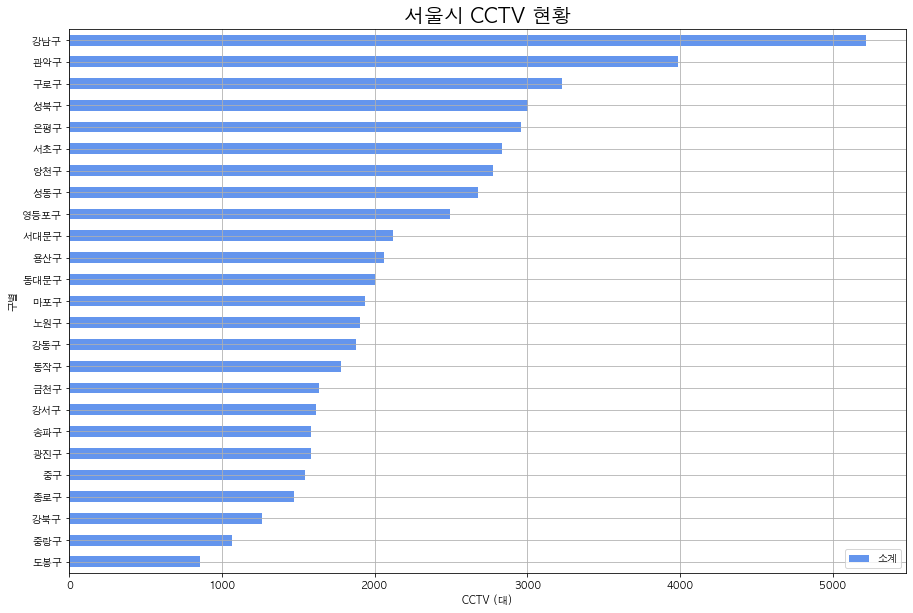

In [98]:
data_cctv.plot(kind='barh', #bar는 세로방향 
            figsize = (15,10),
            grid = True,  # 눈금이 보이게 
            color = 'cornflowerblue'
            )
# 제목
plt.title("서울시 CCTV 현황",size = 20)
plt.xlabel("CCTV (대)")
plt.show()

### 인구대비 CCTV 비율

In [105]:
# CCTV /인구수 
data_result['인구CCTV비율'] = (data_result.소계 / data_result.인구수) * 100
pop_cctv = data_result.loc[:,['인구CCTV비율']]
pop_cctv.sort_values(by='인구CCTV비율',inplace=True)
pop_cctv.head()

,인구CCTV비율
구별,
송파구,0.232933
도봉구,0.257275
중랑구,0.266548
강서구,0.271444
노원구,0.355932


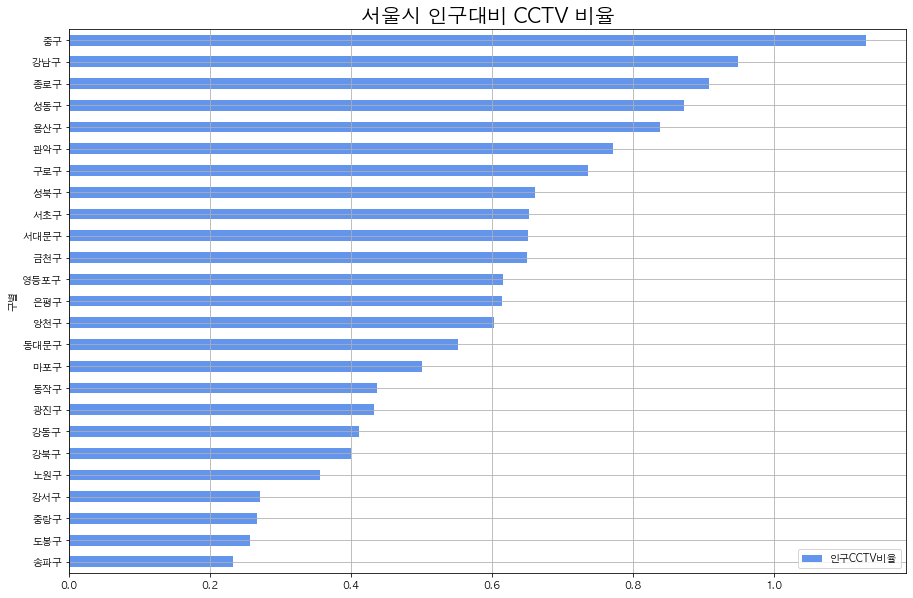

In [112]:
pop_cctv.plot(
    kind='barh',
    figsize = (15,10),
    grid = True , # 눈금 보이게
    color = 'cornflowerblue',
)
# 제목 
plt.title("서울시 인구대비 CCTV 비율",size=20)
plt.show()

<AxesSubplot:ylabel='구별'>

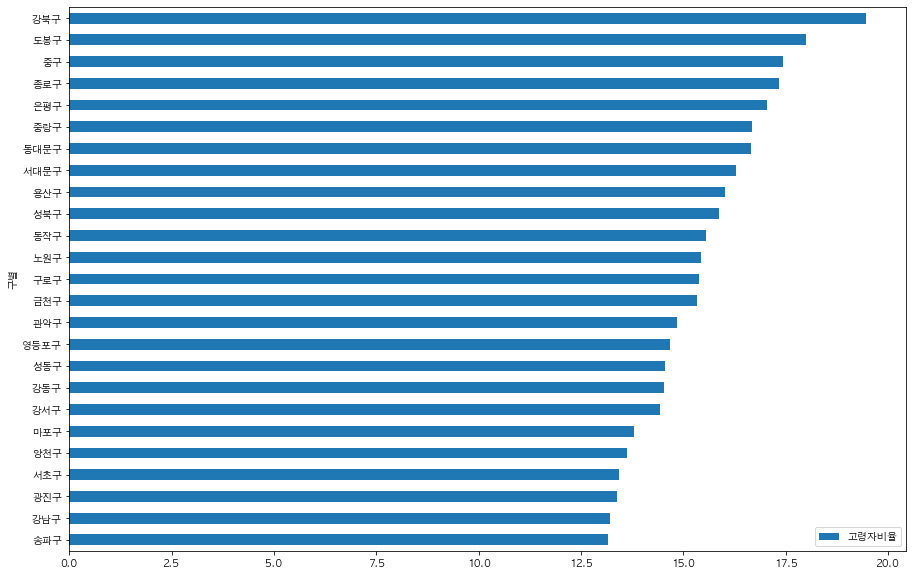

In [122]:
data_result.loc[:,['고령자비율']].sort_values(by='고령자비율').plot(
    kind='barh',figsize=(15,10))

> 강남구를 제외한 다 근접지역 : (중구, 종로구, 성동구 ,용산구)는 CCTV 댓수는 상대적으로 적은 편이지만 
인구대비 cctv 비율로 보면 상위5위권으로 높은 편이다. 
> cctv 수는 top3 강남구, 관악구 ,구로구는 강남 지역 
> 고령화가 우려되는 지역이 강북구,도봉, 중구,  종로구, 은평구 
> 중구와 종로구는 고령화 비율이 높은 편이며 인구대비 cctv 비율이 높다 

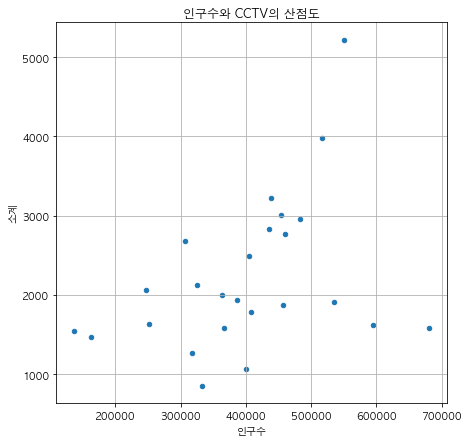

In [137]:
# 산점도를 이용한 시각화 (인구수와 소계)
data_result.loc[:,['인구수','소계']].plot(
    kind='scatter',
    x='인구수',
    y ='소계',
    grid = True,
    figsize= (7,7),
    )
#title
plt.title("인구수와 CCTV의 산점도")
plt.show()

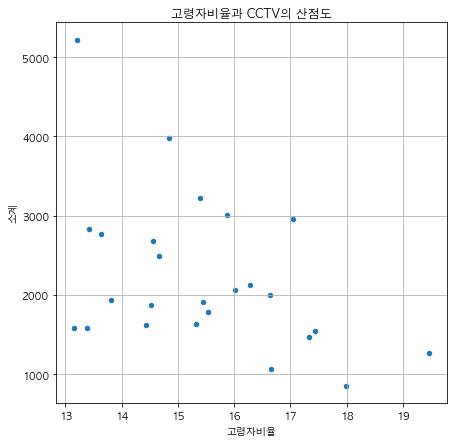

In [138]:
# 산점도를 이용한 시각화 (고령자비율과  소계)
data_result.loc[:,['고령자비율','소계']].plot(
    kind='scatter',
    x='고령자비율',
    y ='소계',
    grid = True,
    figsize= (7,7),
    )
#title
plt.title("고령자비율과 CCTV의 산점도")
plt.show()

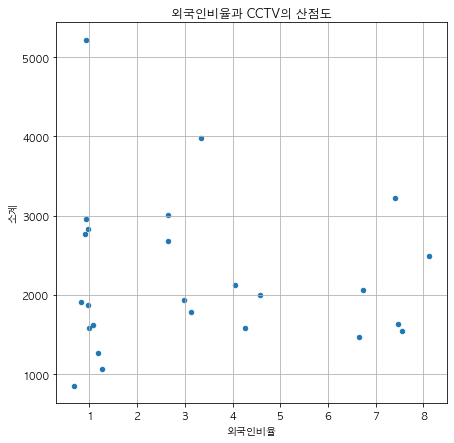

In [140]:
# 산점도를 이용한 시각화 (외국인비율과  소계)
data_result.loc[:,['외국인비율','소계']].plot(
    kind='scatter',
    x='외국인비율',
    y ='소계',
    grid = True,
    figsize= (7,7),
    )
#title
plt.title("외국인비율과 CCTV의 산점도")
plt.show()

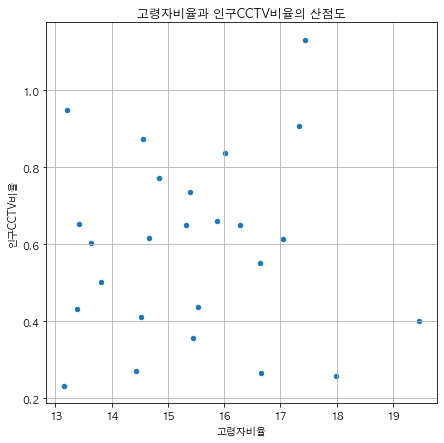

In [142]:
# 산점도를 이용한 시각화 (외국인비율과  소계)
data_result.loc[:,['고령자비율','인구CCTV비율']].plot(
    kind='scatter',
    x='고령자비율',
    y ='인구CCTV비율',
    grid = True,
    figsize= (7,7),
    )
#title
plt.title("고령자비율과 인구CCTV비율의 산점도")
plt.show()

In [143]:
# 인구수, 소계에 따른 기준직선(회귀선,평균선 ) 만들기
fp1 = np.polyfit(data_result['인구수'],data_result['소계'],1)
fp1

array([2.88522756e-03, 1.06403852e+03])

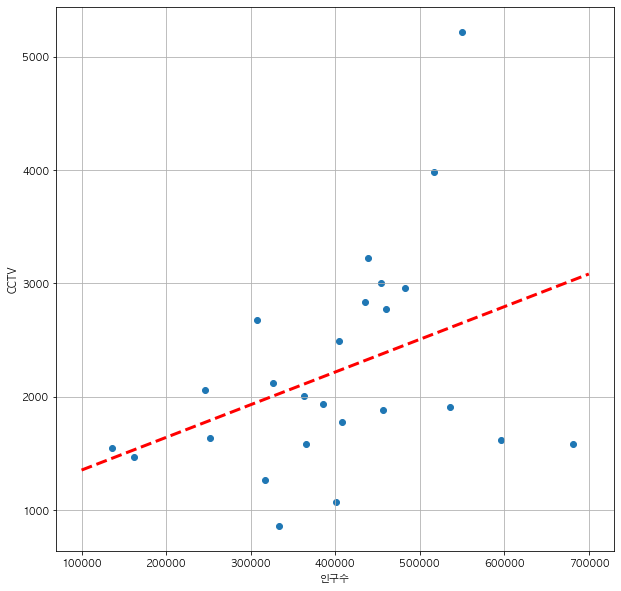

In [150]:
# x축 만들기 : 인구수 표현 
fx = np.linspace(100000,700000)
# y축 데이터 만들기 : cctv 소계 표현
f1 = np.poly1d(fp1)

plt.figure(figsize =(10,10))
plt.scatter(data_result['인구수'],data_result['소계'])
# 기준직선 그려주기
plt.plot(fx,f1(fx), ls = 'dashed', lw = 3 , color = 'r')
# label
plt.xlabel("인구수")
plt.ylabel("CCTV")
plt.grid()
plt.show()

> 이 직선은 cctv 댓수에 기준값이 됩니다. 
> 직선 기준 상위에 있는 점은 과하게 설치, 아래에 있는 점은 인구수에 비해 cctv가 부족하다는 해석이 된다.

In [155]:
# 기준선 구하기 
fp1 = np.polyfit(data_result['인구수'],data_result['소계'],1)

# 기준치 구하기
f1 = np.poly1d(fp1)

# 인구수 
fx = np.linspace(100000,700000)

# 소계에서 기준인구수 차이로 오차값 구하기 
data_result['오차'] = np.abs(data_result['소계'] - f1(data_result['인구수']))

# 정렬 
df_sort = data_result.sort_values(by ='오차',ascending=False)
df_sort.head()

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율,인구CCTV비율,오차
구별,,,,,,,,,,
강남구,5221,52.171379,549898,544804,5094,72602,0.926354,13.202812,0.949449,2570.380612
송파구,1586,62.833676,680883,674095,6788,89539,0.996941,13.150424,0.232933,1442.540920
관악구,3985,99.150425,516662,499374,17288,76664,3.346095,14.838328,0.771297,1430.274035
도봉구,858,66.601942,333495,331238,2257,60023,0.676772,17.998171,0.257275,1168.247488
강서구,1617,77.887789,595703,589302,6401,85992,1.074529,14.435381,0.271444,1165.777237


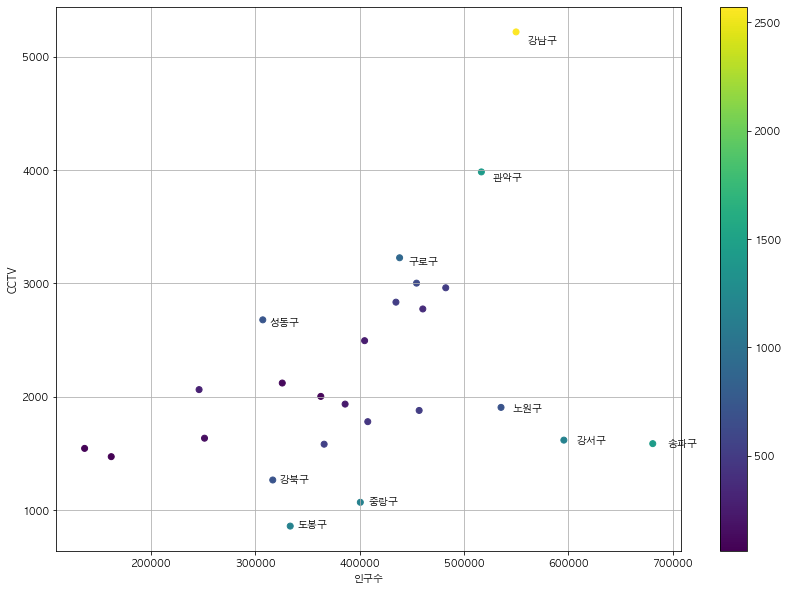

In [162]:
# 그래프에 텍스트와 color
plt.figure(figsize =(14,10))
plt.scatter(data_result['인구수'], data_result['소계'], c = data_result['오차'])

# 오차가 가장 큰 10개구 텍스트에 붙이기
for n in range(10):
    plt.text(df_sort['인구수'][n]* 1.02, df_sort['소계'][n] * 0.98, df_sort.index[n],fontsize = 10)
            # x,y위치, 데이터
#label
plt.xlabel("인구수")
plt.ylabel("CCTV")
plt.colorbar()
plt.grid()
plt.show()